# PSet1 Coding Problems

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
# ^^ Predefined ‘magic function’ telling Jupyter to display images inline (rather than pop up a separate window)
import matplotlib.image as mimg
# ^^ package to help us read in images
import numpy as np
import random
import os

## Provided functions

FashionMNIST contains 10 classes, labeled as 0,1,2,...,9 in the dataset. Below is the mapping between numeric labels and their actual classes

In [2]:
classes_dict={0:'T-shirt/top',
              1:'Trouser',
              2:'Pullover',
              3:'Dress',
              4:'Coat',
              5:'Sandal',
              6:'Shirt',
              7:'Sneaker',
              8:'Bag',
              9:'Ankle boot'}

In [3]:
def makeDataBase(basename,partition='train',N=None, shuffle=False,normalize=True):
    '''
    This function will create one database that will contain images with their lables
    The data are supposed to be in the paths consisting of
     <basename> / <partition> / <category> / <category>-<index>.jpg
     e.g., FashionMNIST/val/4/4-37.jpg
    Inputs:
        basename (str)  : name of the folder containing all the data. It should be "FashionMNIST"
        partition (str) : "train" or "val" or "test"
        N (int)         : number of examples for each category; when N=None, all samples will be loaded
        shuffle (bool)  : boolean value; if False, samples from category 0 will be returned first and samples from category 9 last
                          if True, samples will be randomly shuffled
        normalize (bool): boolean value; if True, samples are normalized to [-1,1]
    Outputs:
        database (list) : list of tuples (x,y). x is image data. y is numeric label of x 
        
    '''
    database=[]
    for label in range(10):
        n = len(os.listdir(os.path.join(basename,partition,str(label)))) if N is None else N
        for i in range(n):          
            imageName=os.path.join(basename,partition,str(label),str(label)+'-'+str(i)+'.jpg')
            imageData=mimg.imread(imageName)
            imageData = np.float32(imageData) if not normalize else np.float32(imageData)/255*2-1
            database.append((imageData,label))
    if shuffle:
        random.shuffle(database)
    return database



In [4]:
def list2ndarray(dataset):
    '''
    This function will take the output from makeDataBase() and return two numpy arrays: X and y
    Inputs:
        dataset (list): list of (sample, label) pairs
    Outputs:
        X (array)     : a 2D numpy array with size (N,D). N is the length of dataset, D is 28*28. 
                        Each row of X is an image sample flattened
        y (array)     : a numpy array with size (N,). y contains numeric labels of corresponding samples
    '''
    num=len(dataset)
    X = np.empty((num,28*28),dtype=np.float32)
    y = np.empty((num,),dtype=int)
    for i in range(num):
        X[i] = dataset[i][0].flatten()
        y[i] = dataset[i][1]
        
    return X, y

In [5]:
def compute_accuracy(y_hat,y):
    '''
    This function takes predicted labels and ground truth labels and return accuracy
    Inputs:
        y_hat (array): (N,)-shaped numpy array containing predicted labels
        y (array)    : (N,)-shaped numpy array containing ground truth labels
    Outputs:
        accu (float) : accuracy between [0.,1.]
    '''
    accu = np.count_nonzero(y_hat==y)/len(y)
    return accu

## Problem 7

In [80]:
# First we prepare data
trainset = makeDataBase('FashionMNIST',partition='train',N=10, normalize=True)# Try different N:10/50/100/1000;
trainX, trainy = list2ndarray(trainset)

In [81]:
# now also load val and test (these are of fixed size)
valset = makeDataBase('FashionMNIST',partition='val', normalize=True)
testset = makeDataBase('FashionMNIST',partition='test', normalize=True)

valX, valy = list2ndarray(valset)
testX, testy = list2ndarray(testset)

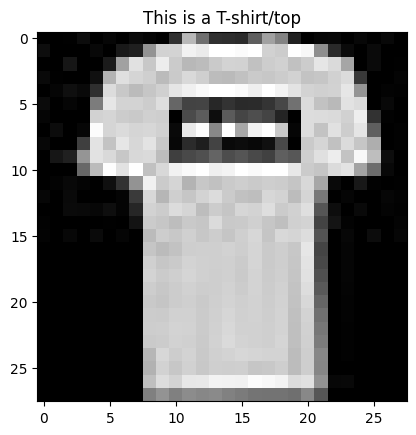

In [48]:
# Some Sanity check: visualize an image and print its class. Play with this a bit to familiarize yourself with the
# kind of data you are working with
plt.imshow(trainset[0][0],cmap='gray')
plt.title(f'This is a {classes_dict[trainset[0][1]]}')
plt.show()

In [87]:
def dist_matrix(A, B):
    # source: https://www.dabblingbadger.com/blog/2020/2/27/implementing-euclidean-distance-matrix-calculations-from-scratch-in-python
    M = A.shape[0]
    N = B.shape[0]
    A_dots = (A*A).sum(axis=1).reshape((M,1)) * np.ones(shape=(1,N))
    B_dots = (B*B).sum(axis=1) * np.ones(shape=(M,1))
    return A_dots + B_dots -2 * np.dot(A, B.transpose())

def KNN_predict(trainX, trainy, testX, k):
    N = len(trainX)
    M = len(testX)
    y_hat = [0] * M
    D = dist_matrix(trainX, testX)
    
    for j in range(M):
        arr = D[:, j].argsort()
        type_cnt = np.array([0] * 10)
        for val in arr[:k]:
            type_cnt[trainy[val]] += 1
        max_type = type_cnt.argmax()
        y_hat[j] = max_type
    
    return y_hat

After trying out all combinations of k and N, select the optimal k and N and compute accuracy on the test partition

In [90]:
max_accuary = 0
max_k = 0
max_n = 0

for n in 10, 50, 100, 1000:
    trainset = makeDataBase('FashionMNIST',partition='train', N=n, normalize=True)
    trainX, trainy = list2ndarray(trainset)
    for k in 1, 3, 7, 15, 25:
        y_hat = KNN_predict(trainX, trainy, valX, k)
        accuracy = compute_accuracy(y_hat, valy)
        print("acc, n, k:", accuracy, n, k)

        if accuracy > max_accuary:
            max_accuary = accuracy
            max_k = k
            max_n = n

print("max acc, max_n, max_k", max_accuary, max_n, max_k)
# max acc, max_n, max_k 0.8167 1000 3

acc, n, k: 0.6641 10 1
acc, n, k: 0.6515 10 3
acc, n, k: 0.6313 10 7
acc, n, k: 0.5751 10 15
acc, n, k: 0.5228 10 25
acc, n, k: 0.7391 50 1
acc, n, k: 0.7391 50 3
acc, n, k: 0.7373 50 7
acc, n, k: 0.7228 50 15
acc, n, k: 0.711 50 25
acc, n, k: 0.751 100 1
acc, n, k: 0.7533 100 3
acc, n, k: 0.7585 100 7
acc, n, k: 0.7497 100 15
acc, n, k: 0.7408 100 25
acc, n, k: 0.8101 1000 1
acc, n, k: 0.8167 1000 3
acc, n, k: 0.8153 1000 7
acc, n, k: 0.8126 1000 15
acc, n, k: 0.8049 1000 25
max acc, max_n, max_k 0.8167 1000 3


In [91]:
# Calc accurary using max k and n
# test_accuracy = compute_accuracy(y_hat, valy)
trainset = makeDataBase('FashionMNIST',partition='train',N=1000, normalize=True)# Try different N:10/50/100/1000;
trainX, trainy = list2ndarray(trainset)
y_hat = KNN_predict(trainX, trainy, testX, k)
accuracy = compute_accuracy(y_hat, testy)

print("best accurary using N = 1000 and k = 3 is", accuracy)
# best accurary using N = 1000 and k = 3 is 0.8016

best accurary using N = 1000 and k = 3 is 0.8016


### Problem 7 Observation
- The bigger the training size (N), the better the accurary.
- For neighbors k, we should avoid extreme values, such as k = 1 or k = 100. 
- If k is too small, although the model will fit the training data almost perfectly, it will not generalize well on the test set.
- If k is too large, the model will incorperate too many neighbors, which are too far away from the data point. 

## Problem 10

In [107]:
def train_perceptron(X,y, max_epoch=20, lr=1., lr_decay=0.95, stop_threshold=0.02):
    '''
    Outputs:
        W (array)             : numpy array with size (num_classes, D)
        b (array)             : numpy array with size (num_classes,)
    '''
    C = 10 # number of classes
    D = len(X[0]) # number of features
    N = len(X) # number of samples
    W = np.random.rand(D, C) * 0.01 # weight matrix, each column is a class
    b = np.random.rand(C) * 0.01 # bias vector

    while max_epoch > 0:
        update_cnt = 0.0
        for i in range(N):
            each_class = np.array(np.matmul(X[i], W) + b)
            best_class = each_class.argmax()
            if best_class != y[i]:
                W[:, best_class] -= lr * X[i].transpose()
                W[:, y[i]] += lr * X[i].transpose()
                b[best_class] -= lr
                b[y[i]] += lr
                update_cnt += 1

        if update_cnt / N < stop_threshold:
            break

        max_epoch -= 1
        lr *= lr_decay

    return W.transpose(), b

In [108]:
def test_perceptron(X, W, b):
    '''
    Outputs:
        y_hat (array): numpy array with size (N,)
    '''
    N = len(X)
    y_hat = np.zeros(N, dtype=int)
    y_matrix = np.matmul(X, W.transpose()) + b
    for i in range(N):
        y_hat[i] = y_matrix[i].argmax()

    return y_hat

In [126]:
# Tune lr on validation partition

trainset = makeDataBase('FashionMNIST',partition='train',N=1000, normalize=True, shuffle=True)
trainX, trainy = list2ndarray(trainset)

best_accu = 0
best_decay_rate = -1

for decay_rate in 0.9, 0.5, 0.3, 0.1, 0.05, 0.01:
    W, b = train_perceptron(trainX, trainy, lr=1, lr_decay=decay_rate) 
    y_hat = test_perceptron(valX, W, b)
    accu = compute_accuracy(y_hat, valy)
    if accu > best_accu:
        best_accu = accu
        best_decay_rate = decay_rate
    print("decay_rate, acc", decay_rate, accu)

print("best rate, acc", best_decay_rate, best_accu)
# best rate, acc 0.3 0.8252

decay_rate, acc 0.9 0.8009
decay_rate, acc 0.5 0.8224
decay_rate, acc 0.3 0.8252
decay_rate, acc 0.1 0.8231
decay_rate, acc 0.05 0.8229
decay_rate, acc 0.01 0.8147
best rate, acc 0.3 0.8252


In [122]:
# Test accu on test set
lr = 0.5
W, b = train_perceptron(trainX, trainy, lr=0.5)
y_hat = test_perceptron(testX, W, b)
accu = compute_accuracy(y_hat, testy)
print("best lr, acc", lr, accu)
# best lr, acc 0.5 0.7655

best lr, acc 0.5 0.7655


## Problem 11

In [119]:
trainset = makeDataBase('FashionMNIST',partition='train',N=1000, normalize=True, shuffle=False)
trainX, trainy = list2ndarray(trainset)
W, b = train_perceptron(trainX, trainy, lr=1.0)
y_hat = test_perceptron(valX, W, b)
accu = compute_accuracy(y_hat, valy)
print("y_hat", y_hat)
# [9 9 9 ... 9 9 9]
print("un-shuffle acc", accu)
# un-shuffle acc 0.1059

[9 9 9 ... 9 9 9]
un-shuffle acc 0.1194


# What do you observe? What could be the reason?

- If no shuffle, the first N samples will c1 class, second N samples will be c2 class, ..., tenth N samples will be c10 class.  
- When training on this dataset, after first N samples, c1 class's weight will be boosted, and other classes' weights negligible.
- After second N samples, c2's weight will be high, and others weights negligible.
- ...
- After tenth N samples, c10's weight will be high, and other weights negligible.
- Therefore, the trained weights will be dominated by c10, thus causing the prediction to be always class 10 (which is index 9 in y_hat).
- Hence, when apply the model on a test set, the accurary will be close to 1/10, as the model will always predict index 9 class. 